In [123]:
import phoebe 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

logger = phoebe.logger(clevel = 'WARNING')

In [124]:
b = phoebe.open('/mnt/c/Users/Karan/Documents/GitHub/Eclipsing-Binary-Modeling/bundles/after_estimators.bundle')

# Optimizers - Nelder Mead

In [125]:
b.add_compute(compute = 'fast_optimize')

<ParameterSet: 46 parameters | datasets: rv01, lc01, _default>

In [126]:
b.set_value_all('ld_mode', 'interp')
b.set_value_all('atm', 'ck2004')
b.set_value('irrad_method', compute = 'fast_optimize', value = 'none')
b.set_value_all('rv_method', compute = 'fast_optimize', value = 'dynamical')
b.set_value_all('distortion_method', compute = 'fast_optimize', value = 'sphere')

### Fitting RV with Nelder Mead optmizer

In [127]:
b.disable_dataset('lc01')
b.enable_dataset('lc01')

<ParameterSet: 18 parameters | components: binary, secondary, primary>

In [128]:
b.flip_constraint('compute_phases@rv01', solve_for = 'compute_times')
b.set_value_all('compute_phases', dataset = 'rv01', value = phoebe.linspace(0, 1, 61))

In [129]:
b.add_solver('optimizer.nelder_mead', solver = 'nm', compute = 'fast_optimize')

<ParameterSet: 14 parameters | qualifiers: initial_values, maxiter, adaptive, use_server, fatol, comments, progress_every_niters, priors, expose_lnprobabilities, fit_parameters, continue_from, priors_combine, xatol, compute>

In [130]:
b.set_value('maxiter@nm' , value = 100)

In [131]:
fit_params = ['vgamma@system', 'q@binary', 'asini@binary', 'ecc@binary', 'per0@binary']
b.set_value('fit_parameters@nm', value = fit_params)

In [132]:
b.run_solver('nm', solution = 'fnm_rv_sol')

100%|██████████| 100/100 [09:14<00:00,  5.55s/it]


<ParameterSet: 11 parameters | qualifiers: initial_values, success, comments, niter, adopt_values, adopt_parameters, fitted_values, fitted_units, message, fitted_twigs, adopt_distributions>

In [133]:
print(b.filter(solution = 'fnm_rv_sol', qualifier = ['initial_values', 'success', 'niter']))

ParameterSet: 3 parameters
R       niter@fnm_rv_sol@solution: 100
R     success@fnm_rv_sol@solution: False
R  initial_values@fnm_rv_sol@s...: [14.814815330899723
 0.8993744770370283
 26.247647344046097
 0.22549413136476038
 83.92496480061736]


In [134]:
print(b.adopt_solution('fnm_rv_sol', trial_run = True))

ParameterSet: 5 parameters
                    vgamma@system: 33.11937382280813 km / s
         q@binary@orbit@component: 0.851178821375735
     asini@binary@orbit@component: 28.963397746610852 solRad
       ecc@binary@orbit@component: 0.04998259417740297
      per0@binary@orbit@component: 60.17271171315349 deg


In [135]:
b.adopt_solution('fnm_rv_sol')

<ParameterSet: 25 parameters | contexts: dataset, component, system>

In [136]:
b.run_compute(compute = 'fast_optimize', solution = 'fnm_rv_sol', model = 'fnm_rv_model')

Fri, 26 Jul 2024 15:07 BUNDLE       WARNING applying passed solution (fnm_rv_sol) to sample_from
Fri, 26 Jul 2024 15:07 BUNDLE       WARNING defaulting sample_num=1 since adopt_distributions@fnm_rv_sol=False
Fri, 26 Jul 2024 15:07 BACKENDS     WARNING only one sample, falling back on sample_mode='all', sample_num=1 instead of sample_mode='1-sigma', sample_num=1
100%|██████████| 1/1 [00:02<00:00,  2.46s/it]


<ParameterSet: 13 parameters | kinds: lc, rv>

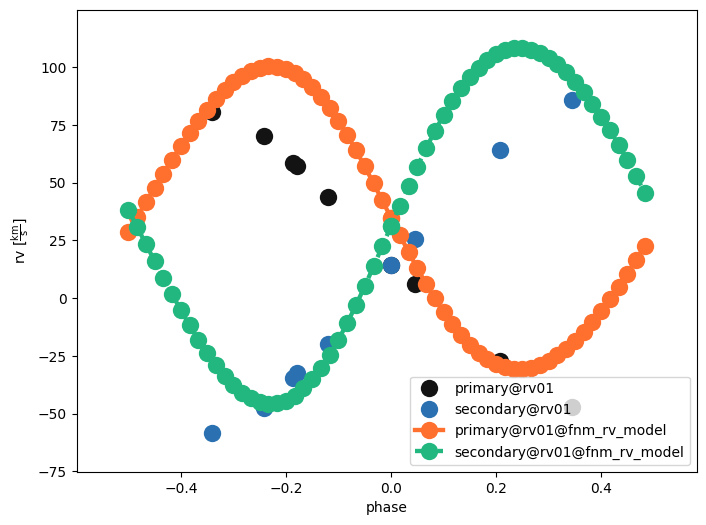

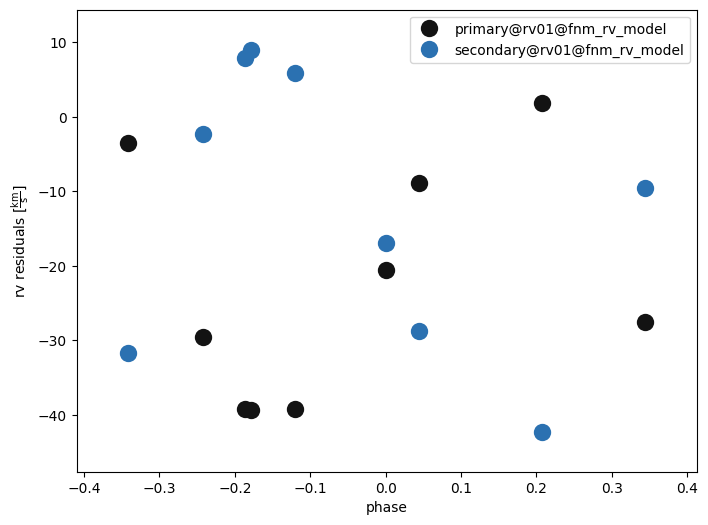

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [137]:
b.plot(model = 'fnm_rv_model', kind = 'rv', x = 'phases', show = True, legend = True, marker = 'o')
b.plot(model = 'fnm_rv_model', kind = 'rv', x = 'phases', y = 'residuals', show = True, legend = True, marker = 'o')

In [138]:
b.enable_dataset('lc01')

<ParameterSet: 18 parameters | components: binary, secondary, primary>

In [139]:
b.set_value('compute_phases', dataset = 'lc01', value = phoebe.linspace(0, 1, 301))

Fri, 26 Jul 2024 15:07 BUNDLE       WARNING applying passed solution (fnm_rv_sol) to sample_from
Fri, 26 Jul 2024 15:07 BUNDLE       WARNING defaulting sample_num=1 since adopt_distributions@fnm_rv_sol=False
Fri, 26 Jul 2024 15:07 BACKENDS     WARNING only one sample, falling back on sample_mode='all', sample_num=1 instead of sample_mode='1-sigma', sample_num=1
100%|██████████| 1/1 [00:05<00:00,  5.55s/it]
/home/karanbt/miniconda3/envs/astro/lib/python3.11/site-packages/phoebe/dependencies/autofig/call.py:1305: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  artist = ax.scatter(*datapoint,


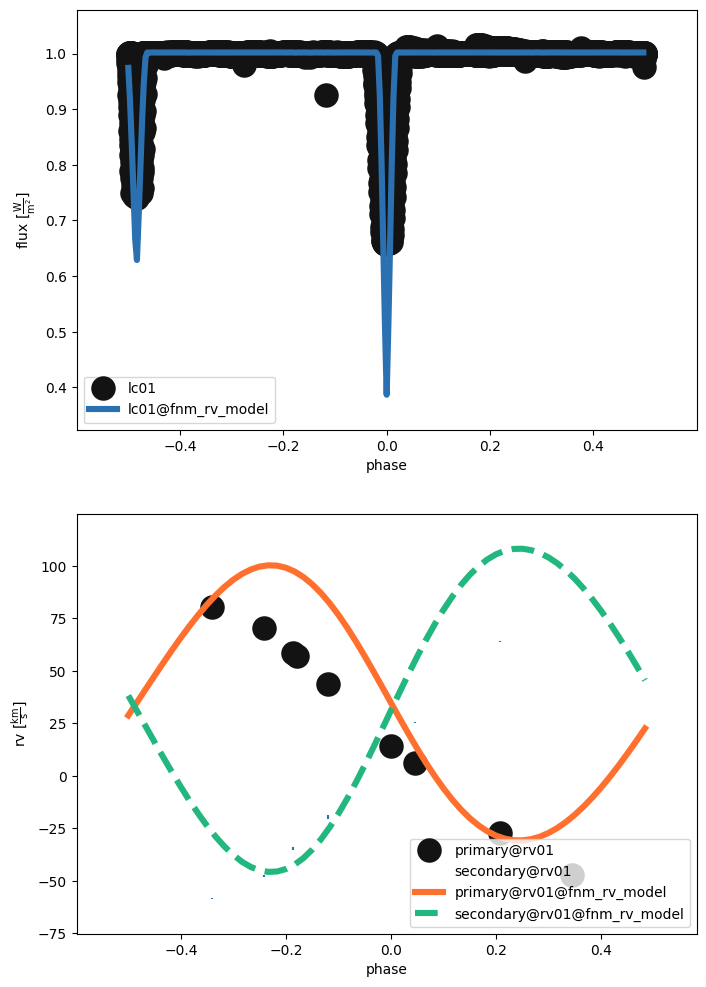

(<autofig.figure.Figure | 2 axes | 6 call(s)>,
 <Figure size 800x1200 with 2 Axes>)

In [140]:
b.run_compute(compute = 'fast_optimize', solution = 'fnm_rv_sol', model = 'fnm_rv_model', overwrite = True)
b.plot(model = 'fnm_rv_model', x = 'phases', legend = True, show = True)

### Fitting LC with Nelder Mead optimizer

In [141]:
b.disable_dataset('rv01')

<ParameterSet: 20 parameters | components: binary, secondary, primary>

In [142]:
b.set_value('adopt_parameters@lcgeom_sol', value = ['mask_phases'])
b.adopt_solution('lcgeom_sol', adopt_parameters = 'mask_phases')

<ParameterSet: 1 parameters>

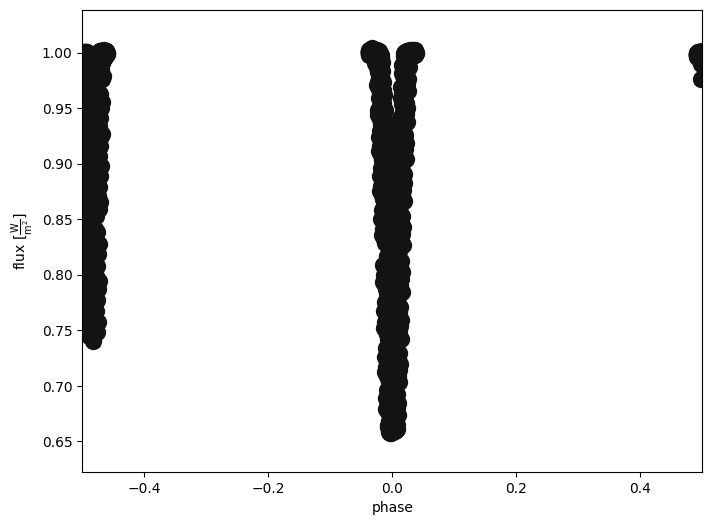

(<autofig.figure.Figure | 1 axes | 1 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [143]:
b.plot(kind='lc', model='after_nm', x='phases', xlim=(-0.5,0.5), show='True')

In [144]:
fit_params = ['teffratio@binary', 'incl@binary', 'requivsumfrac@binary']
b.set_value('fit_parameters@nm', fit_params)

In [145]:
b.set_value('maxiter@nm', value = 100)

In [146]:
b.run_solver('nm', compute = 'fast_optimize', solution = 'fnm_lc_sol')

100%|██████████| 100/100 [09:57<00:00,  5.98s/it]


<ParameterSet: 11 parameters | qualifiers: initial_values, success, comments, niter, adopt_values, adopt_parameters, fitted_values, fitted_units, message, fitted_twigs, adopt_distributions>

In [147]:
print(b.filter(solution = 'fnm_lc_sol', qualifier = ['initial_values', 'success', 'niter']))

ParameterSet: 3 parameters
R       niter@fnm_lc_sol@solution: 100
R     success@fnm_lc_sol@solution: False
R  initial_values@fnm_lc_sol@s...: [0.8906049650601696
 90.0
 0.11525020642323608]


In [148]:
print(b.adopt_solution('fnm_lc_sol', trial_run = True))

ParameterSet: 3 parameters
   teffratio@binary@orbit@comp...: 0.8285987610911812
      incl@binary@orbit@component: 85.76193678013306 deg
   requivsumfrac@binary@orbit@...: 0.16528282395868477


In [149]:
b.adopt_solution('fnm_lc_sol')

<ParameterSet: 19 parameters | kinds: star, orbit>

In [150]:
b.run_compute(compute = 'fast_optimize', solution = 'fnm_lc_sol', model = 'fnm_lc_model')

Fri, 26 Jul 2024 15:17 BUNDLE       WARNING applying passed solution (fnm_lc_sol) to sample_from
Fri, 26 Jul 2024 15:17 BUNDLE       WARNING defaulting sample_num=1 since adopt_distributions@fnm_lc_sol=False


Fri, 26 Jul 2024 15:17 BACKENDS     WARNING only one sample, falling back on sample_mode='all', sample_num=1 instead of sample_mode='1-sigma', sample_num=1
100%|██████████| 1/1 [00:09<00:00,  9.05s/it]


<ParameterSet: 9 parameters | qualifiers: samples, sample_mode, sampled_twigs, comments, fluxes, sampled_uniqueids, flux_scale, times, failed_samples>

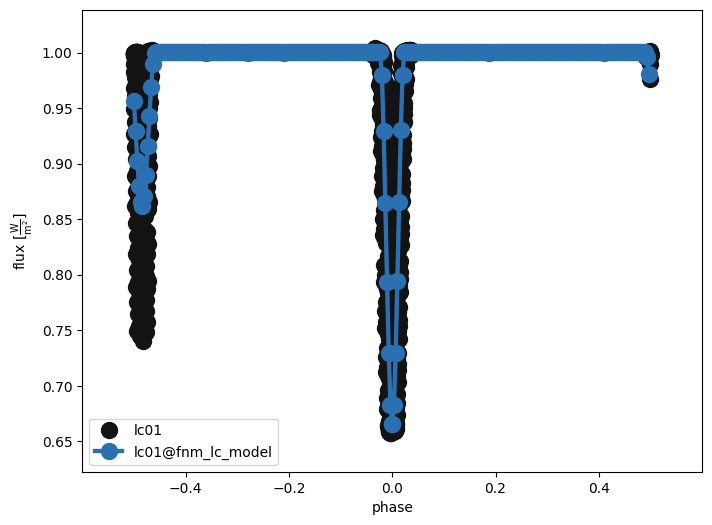

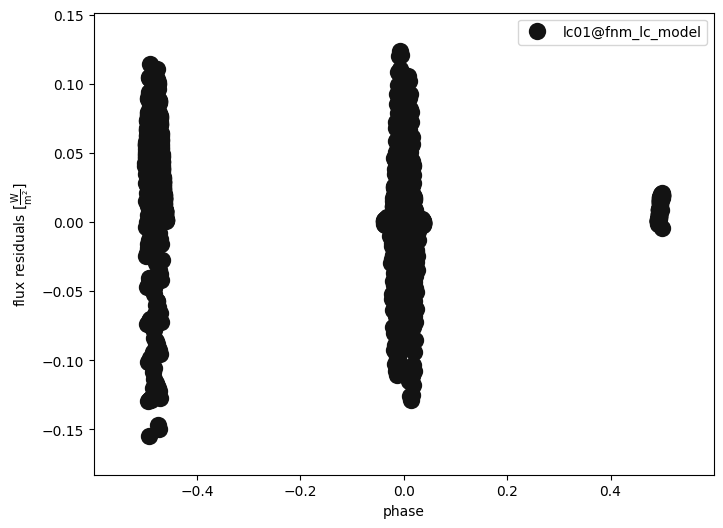

(<autofig.figure.Figure | 1 axes | 1 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [151]:
b.plot(model = 'fnm_lc_model', kind = 'lc', x ='phases', show = True, legend = True, marker = 'o')
b.plot(model = 'fnm_lc_model', kind = 'lc', x ='phases', y = 'residuals', show = True, legend = True, marker = 'o')

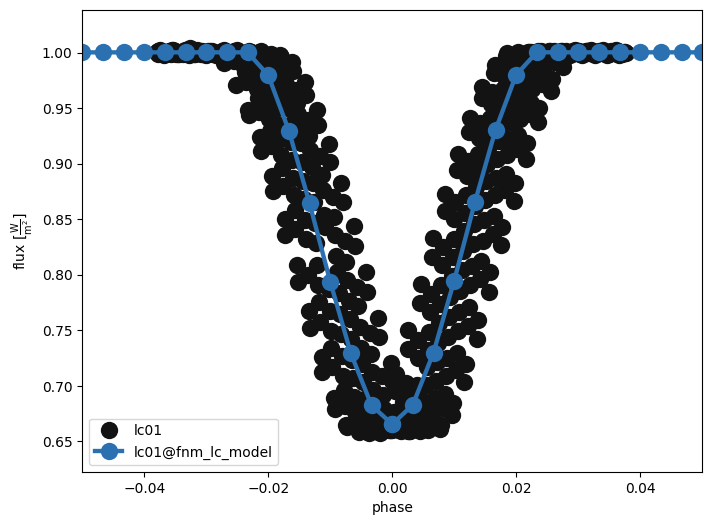

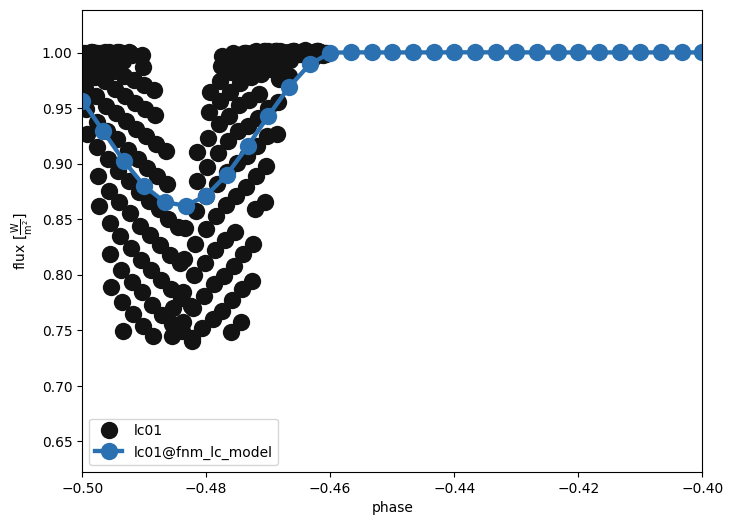

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [152]:
b.plot(model = 'fnm_lc_model', kind = 'lc', x = 'phases', show = True, legend = True, marker = 'o', xlim = (-0.05, 0.05))
b.plot(model = 'fnm_lc_model', kind = 'lc', x = 'phases', show = True, legend = True, marker = 'o', xlim = (-0.5, -0.4))

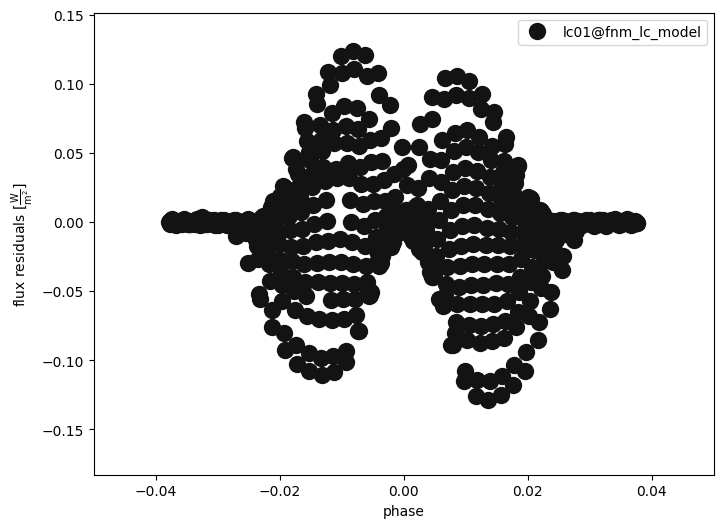

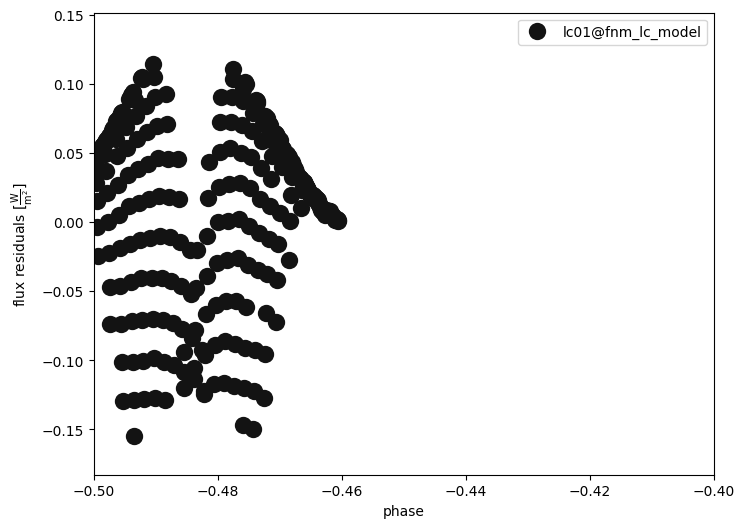

(<autofig.figure.Figure | 1 axes | 1 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [153]:
b.plot(model='fnm_lc_model', kind = 'lc', x = 'phases', y = 'residuals', show = True, legend = True, marker = 'o', xlim = (-0.05,0.05))
b.plot(model='fnm_lc_model', kind = 'lc', x = 'phases', y = 'residuals', show = True, legend = True, marker = 'o', xlim = (-0.5, -0.4))

In [154]:
b.enable_dataset('rv01')

<ParameterSet: 20 parameters | components: binary, secondary, primary>

Fri, 26 Jul 2024 15:17 BUNDLE       WARNING applying passed solution (fnm_lc_sol) to sample_from
Fri, 26 Jul 2024 15:17 BUNDLE       WARNING defaulting sample_num=1 since adopt_distributions@fnm_lc_sol=False


Fri, 26 Jul 2024 15:17 BACKENDS     WARNING only one sample, falling back on sample_mode='all', sample_num=1 instead of sample_mode='1-sigma', sample_num=1
100%|██████████| 1/1 [00:19<00:00, 19.83s/it]


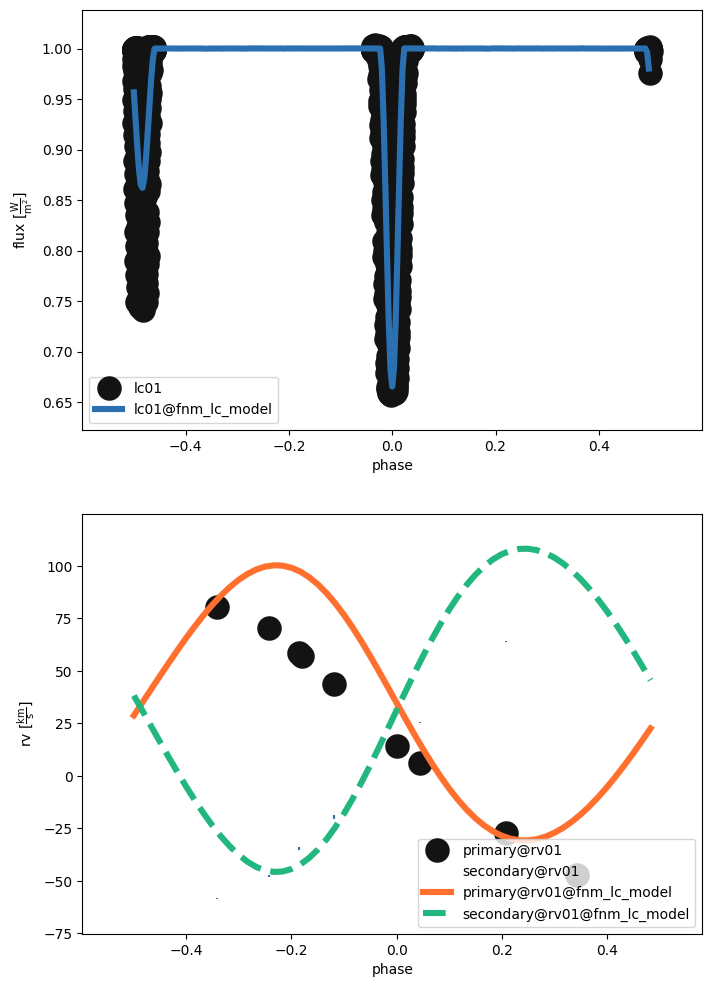

(<autofig.figure.Figure | 2 axes | 6 call(s)>,
 <Figure size 800x1200 with 2 Axes>)

In [155]:
b.run_compute(compute = 'fast_optimize', solution = 'fnm_lc_sol', model = 'fnm_lc_model', overwrite = True)
b.plot(model = 'fnm_lc_model', x = 'phases', show = True, legend = True )

In [157]:
b.save('after_fast_nm.bundle')

'after_fast_nm.bundle'